# Entregável 3 de Visão Computacional e Robótica


Entrega até 12/03 ao fim do atendimento

Pode ser feito **em trios**

Nesta semana vamos trabalhar com um assunto extremamente atual: reconhecimento de objetos e rastreamento


Referências:

[https://www.pyimagesearch.com/2018/07/30/opencv-object-tracking/](https://www.pyimagesearch.com/2018/07/30/opencv-object-tracking/)

[https://github.com/iArunava/YOLOv3-Object-Detection-with-OpenCV/](https://github.com/iArunava/YOLOv3-Object-Detection-with-OpenCV/)

[https://www.pyimagesearch.com/2017/09/11/object-detection-with-deep-learning-and-opencv/](https://www.pyimagesearch.com/2017/09/11/object-detection-with-deep-learning-and-opencv/)

Ouça a explicacão do professor sobre rastreamento e deteção

### 1. Ponto de fuga

Robôs que trabalham dentro de prédios precisam saber seguir corredores.

Uma das maneiras de fazer isso é o robô alinhar o centro de sua câmera ao ponto de fuga do corredor, para que sua trajetória seja aproximadamente paralela às paredes do mesmo.


O ponto de fuga é aquele para o qual as retas paralelas parecem convergir

Dada a seguinte imagem de um corredor:

![Imagem do corredor](ponto_fuga.png)

Podemos traçar as linhas geradas pela perspectiva, seu ponto de encontro será o ponto de fuga.



### Revisão: reta passando por dois pontos

![Encontro de duas retas](retas.png)


Seja o ponto $A:(a_x, a_y)$ e o ponto $B:(b_x, b_y)$

Queremos encontrar uma reta $r: y = mx + h$ que passa por $A$ e $B$, em que $m$ é o *coeficiente angular* e $h$ é o intercepto ou coeficiente linear da reta.

Temos que:

$m = \frac{\Delta_y}{\Delta_x} = \frac{b_y - a_y}{b_x - a_x}$

Uma vez encontrado o valor de $m$, a substituição a seguir permite encontrar a equação da reta:

$m = \frac{y - a_y}{x - a_x}$

$mx - ma_x = y - a_y$

$mx = y - a_y + ma_x$

$y = mx -ma_x + a_y$

$h = a_y - ma_x$


$y = mx - ma_x + a_y$

### Interseção de duas retas

Temos que na interseção as duas retas se encontram num ponto $(x_i, y_i)$

Sejam as retas $r1: y = m1x + h1$ e $r2: y = m2x + h2$

Vamos encontrar o ponto $x_i$ em que os valores de $y_i$ serão iguais:

$m1x_i + h1 = m2x_i + h2$

$(m1 - m2)x_i = h2 - h1$

$x_i = \frac{h2 - h1}{m1 - m2}$

$y_i = m1x_i + h1$

**Dados de teste:**

Caso precise testar seu código, você pode conferir com estes valores. As retas definidas por pontos $r1: (P_1, P_2)$ e $r2: (Q_1, Q_2)$, para os valores:

```python

p1 = (3.0, 2.5)
p2 = (4.0, 0.6)
q1 = (1.0, 2.4)
q2 = (0.6, 1.1)
```

Encontram-se no ponto `(1.7572 4.8611)`


Pede-se: 

* A partir do ponto para onde convergem as linhas do corredor, marque o ponto de fuga no vídeo.  Você precisa mostrar as retas que vão convergir.


**Sugestão:** 

A partir do coeficiente angular, selecionar uma reta mais à esquerda e uma mais à direita para encontrar a interseção.

Lembre-se de que na OpenCV o eixo y fica **para baixo**, por isso os coeficientes angulares se comportam como na figura abaixo:

![Valores de coeficiente angular](coeficientes_m.png)

Lembre-se de que, no espaço de cores HSV, o vermelho se encontra no início e no fim da escala do componente H. Se você estiver filtrando vermelho em um só dos extremos pode não ter bons resultados

Vídeos para teste:


[Vídeo 1](https://www.dropbox.com/s/pgm2zghifdyqjeb/VID_20200302_063445951.mp4?dl=0)

[Vídeo 2](https://www.dropbox.com/s/g64xcpx6zl1tac1/VID_20200302_063554327.mp4?dl=0)

[Vídeo 3](https://www.dropbox.com/s/0qa2culfrf4qpge/VID_20200302_063719050.mp4?dl=0)

### 2. Executar os dois exemplos

Há três exemplos: `mobilenet_detection`, `yolov3_detection` e `tracking`.

Os dois primeiros são reconhecedores de objetos, e o último é de rastreamento.


Um dos arquivos abaixo precisa ser baixado e salvo nas pasta  `yolov3_detection/yolov3-coco` .

[https://www.dropbox.com/s/013ogt2bhwfzxwb/yolov3.weights?dl=0](https://www.dropbox.com/s/013ogt2bhwfzxwb/yolov3.weights?dl=0) ou [https://pjreddie.com/media/files/yolov3.weights](https://pjreddie.com/media/files/yolov3.weights)

*Atenção:* Vamos rodar a Yolo só por importância "histórica"

Depois de rodar o demos, estude o notebook  [Demo_Imagenet.ipynb](Demo_Imagenet.ipynb)

## 3. Identificar objeto

Use o projeto `mobilenet_detection` para basear seu código. 

Neste projeto, escolha uma categoria de objetos que o reconhecedor reconhece. Diga aqui qual foi sua escolha

Implemente a seguinte funcionalidade: sempre que o objeto identificado em (2) estiver presente por mais que 5 frames seguidos, desenhe um retângulo fixo ao redor dele. 

<font color='#009aa8'>Classe escolhida: 'cat'</font> 

In [14]:
from IPython.display import Video

Video("mobilenet_detection.mp4")

## 4. Simulador

 Rode o simulador do Turtlebot (use o Waffle).  Veja o guia em [../guides/simulador_ros.md](https://github.com/Insper/robot20/blob/master/guides/simulador_ros.md)
 
 Documente aqui as linhas necessárias para teleop e para abrir o Rviz
 
 Faça um screenshot do seu simulação em execução

####  Turtlebot - wafle

- `export TURTLEBOT3_MODEL=waffle_pi`
- `roslaunch turtlebot3_gazebo turtlebot3_house.launch`

#### Teleop view

- `rqt_image_view`
- `roslaunch turtlebot3_teleop turtlebot3_teleop_key.launch`

#### Abrir Rviz no terminal:

- `roslaunch turtlebot3_gazebo turtlebot3_gazebo_rviz.launch`

### Screen shots do simulador

####  <font color='#009aa8'>abrindo o gazebo, uso do waffle:</font> 

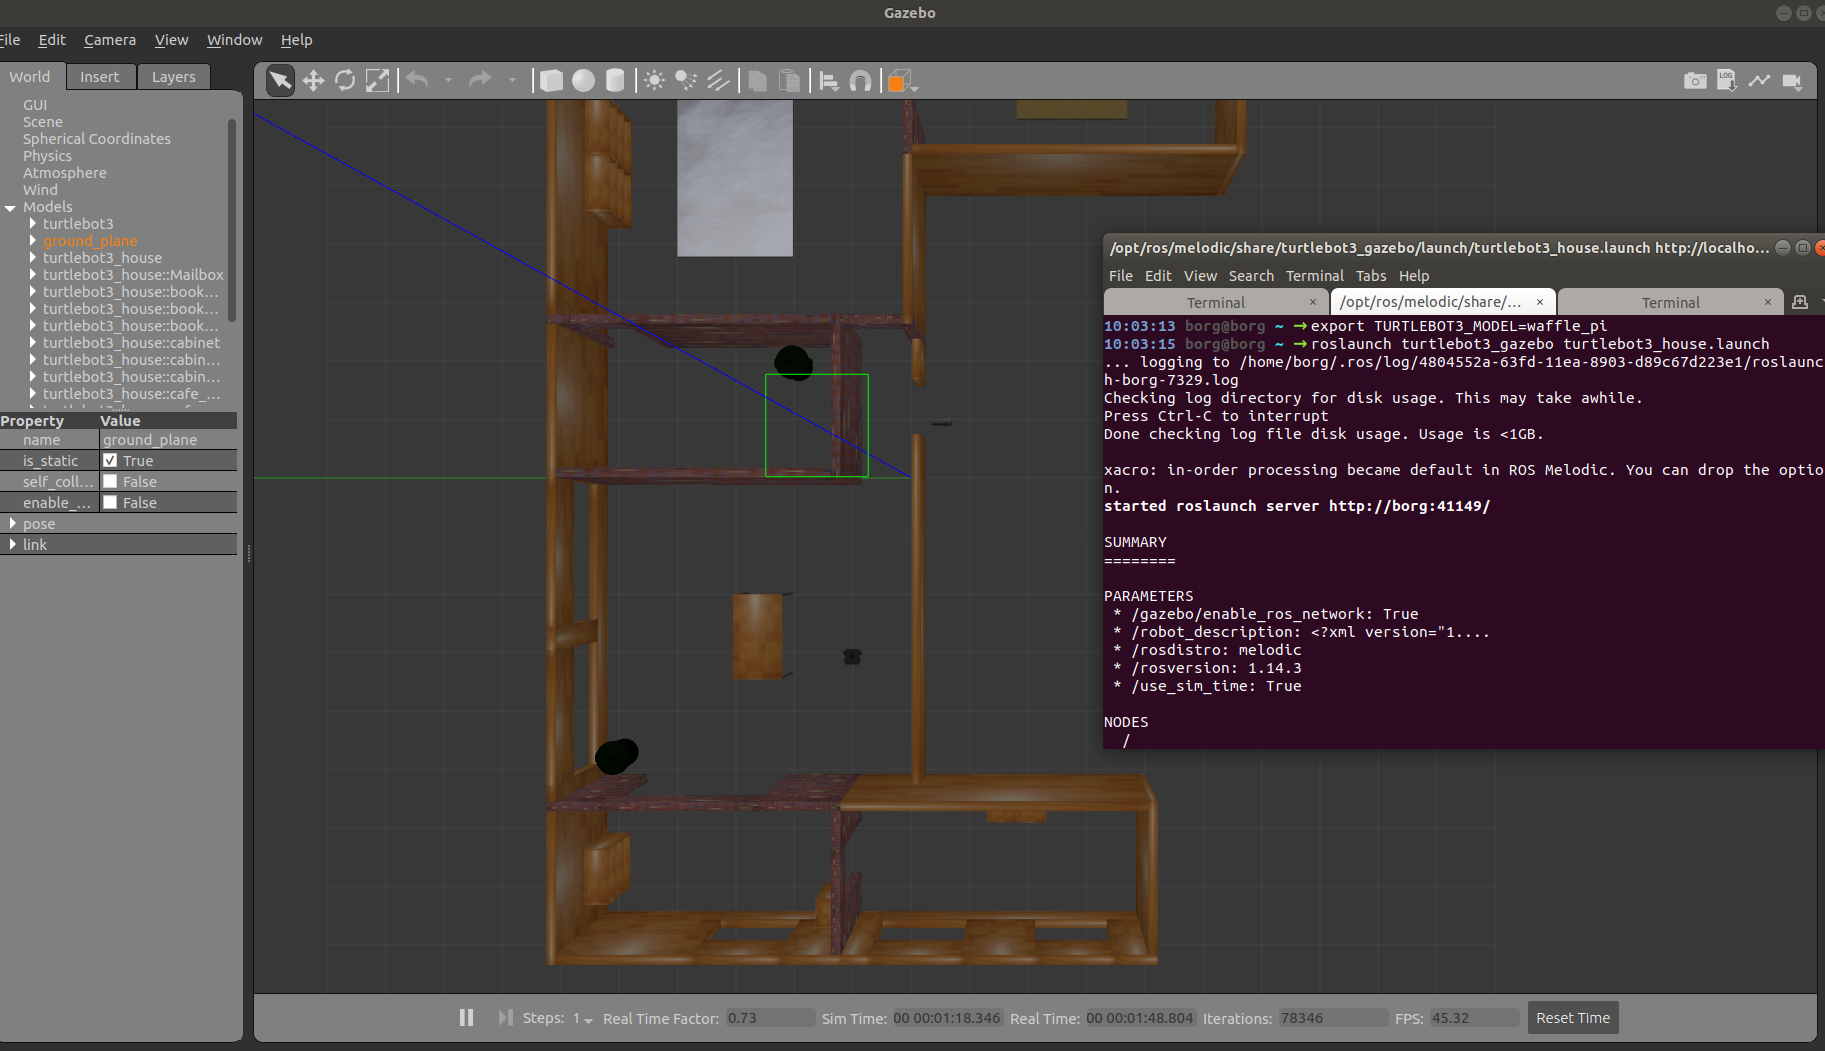

In [5]:
from IPython.display import Image
Image(filename='turtlebot_waffle.png') 

###  <font color='#009aa8'>Rviz</font> 

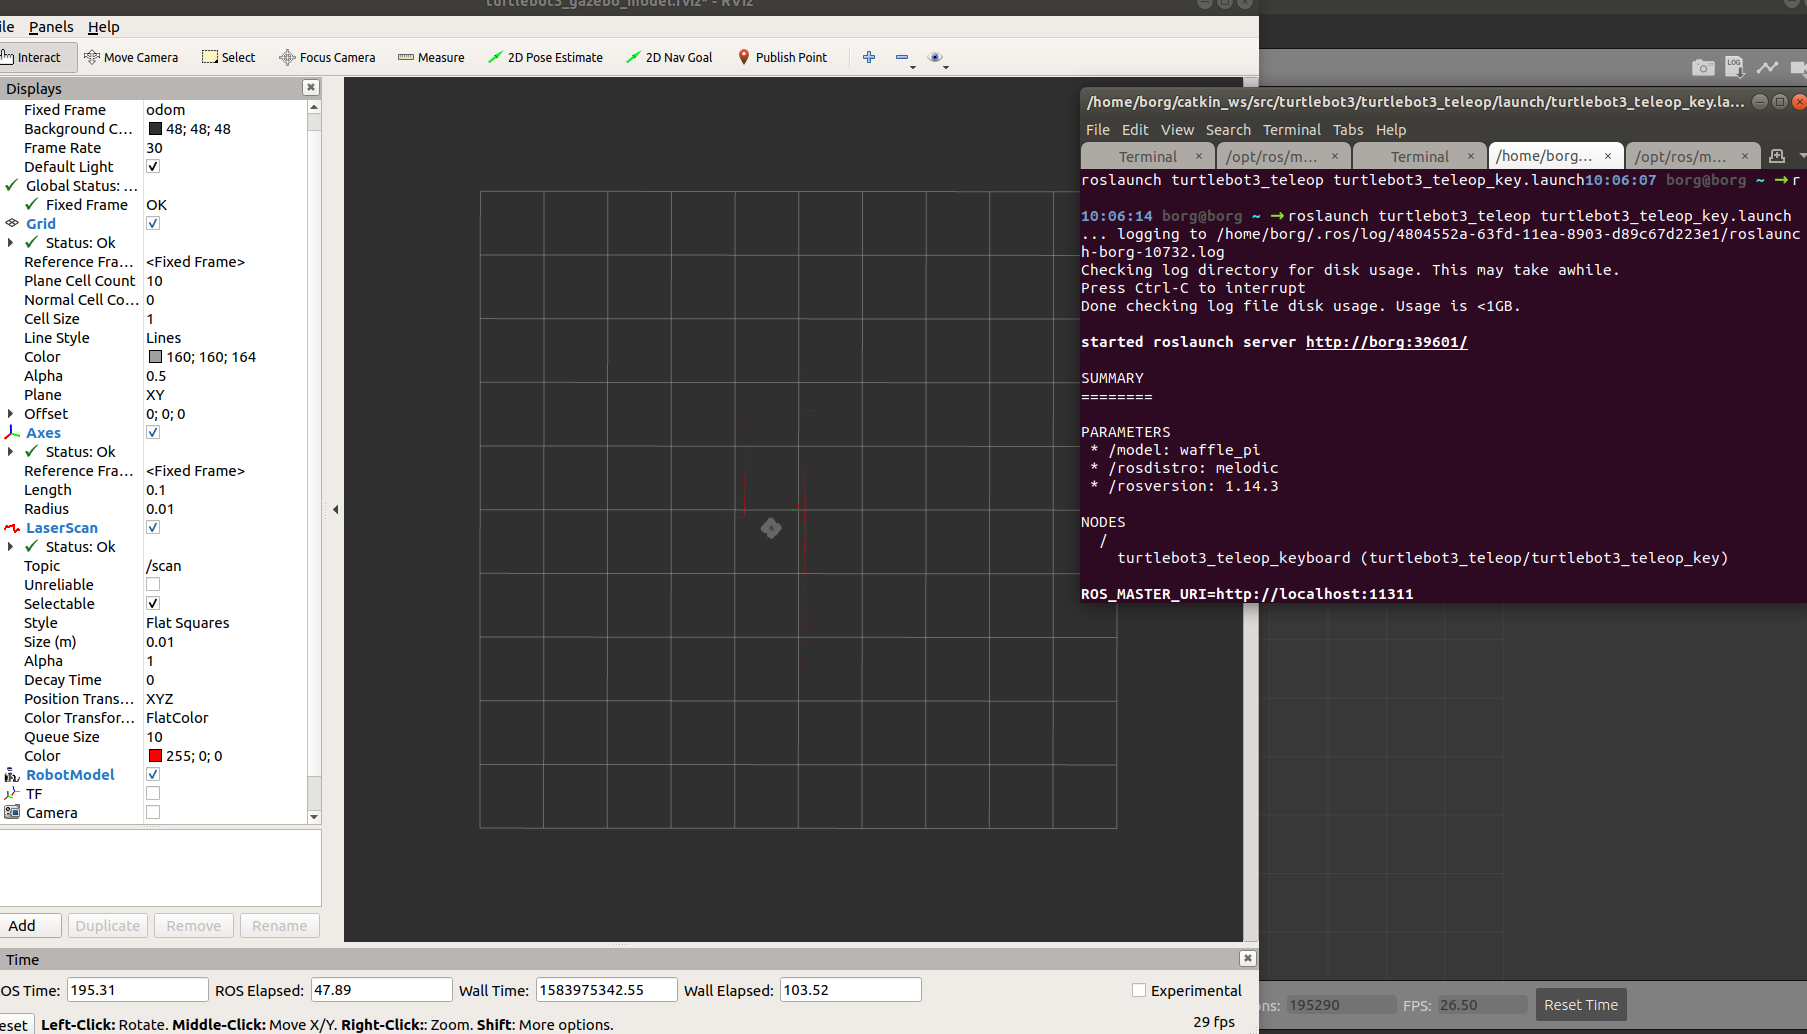

In [2]:
from IPython.display import Image
Image(filename='Rviz.png') 

###  <font color='#009aa8'>Teleop</font> 

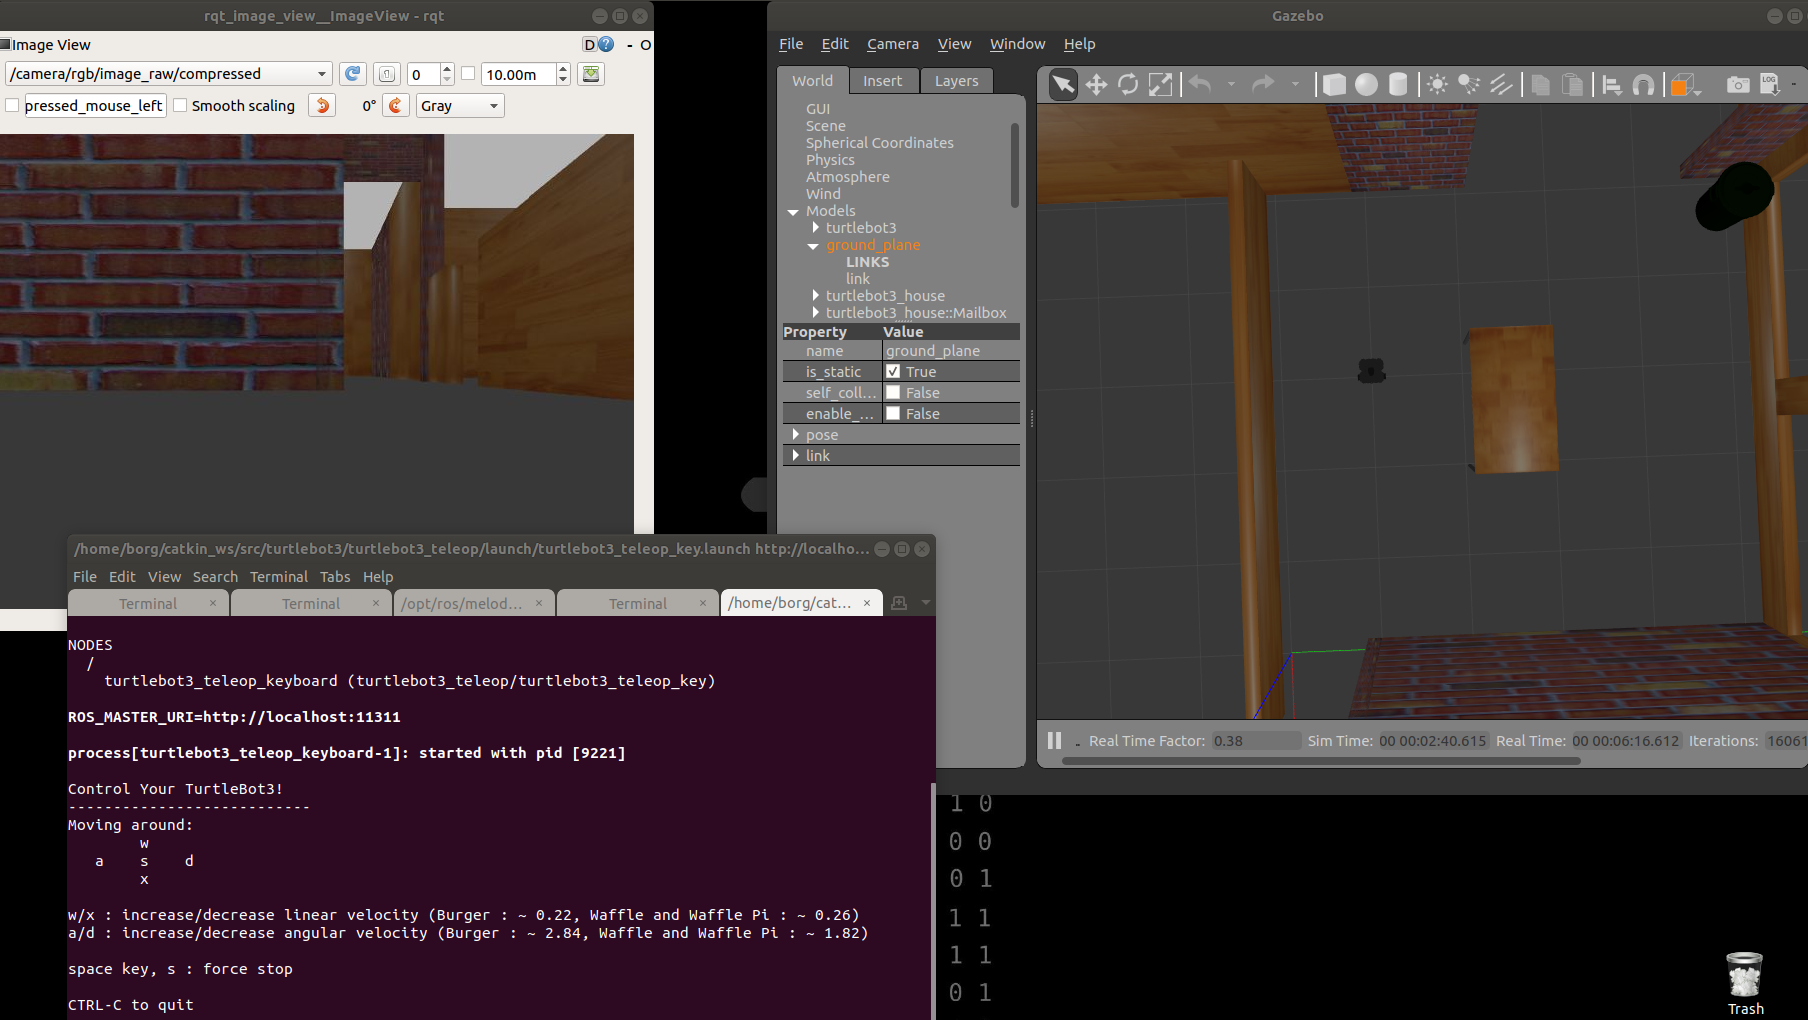

In [3]:
from IPython.display import Image
Image(filename='teleop.png') 

## 5. Robô quadrado

Faça [este tutorial](../guides/projeto_rospython.md) de como criar um projeto Python que comanda o robô simulado.

Usando o simulador, crie um código que faça o robô fazer uma trajetória que aproxima um quadrado.

Baseie-se no código `roda.py`, construído durante o tutorial 

In [6]:
from IPython.display import Video

Video("robo_quadrado.mp4")

## 6. Robô indeciso

Usando o simulador e o LIDAR simulado, faça um robô avançar quando o obstáculo bem à sua frente estiver a menos de 1.0m e recuar quando estiver a mais de 1.02 m.

Baseie-se no código `le_scan.py` e `roda.py`, desenvolvidos [durante o tutorial](https://github.com/Insper/robot20/blob/master/guides/projeto_rospython.md)

In [7]:
from IPython.display import Video

Video("robo_confuso.mp4")